# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [27]:
!pip install gym==0.26.2 matplotlib numpy

In [123]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

class CustomFrozenLakeEnv(FrozenLakeEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def step(self, action):
        state, reward, done, a,b = super().step(action)
        row, col = divmod(state, self.ncol)
        tile = self.desc[row][col].decode("utf-8")
        if tile == 'H':
            reward = -1  # Assign custom reward for falling into a hole
        return state, reward, done,a,b

# Usage
env = CustomFrozenLakeEnv(is_slippery=True)

state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

## Training Loop
Complete the training loop

In [ ]:
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            pass
            #TODO select action

            if np.random.rand() < epsilon:
                # not effective with slip on 
                # positive_indices = np.where(Q[state, :] >= 0)[0]
                # if len(positive_indices) > 0:
                #     action = np.random.choice(positive_indices)
                # else:
                #     action = env.action_space.sample()
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state, :])


            next_state, reward, done, _, _ = env.step(action) #uncomment this after adding algo to choose action
            
            #TODO Update The Q values

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            
    
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        epsilon *= decay
        alpha = alpha/(1+decay*ep)
        if ep % 100 == 0:
            print(f"Episode {ep}, Total Reward: {total_reward}, Epsilon: {epsilon:.2f}")

        rewards.append(total_reward)
    return rewards

## Plotting Results

Episode 0, Total Reward: -1.0, Epsilon: 0.99
Episode 100, Total Reward: -1.0, Epsilon: 0.60
Episode 200, Total Reward: -1.0, Epsilon: 0.37
Episode 300, Total Reward: -1.0, Epsilon: 0.22
Episode 400, Total Reward: -1.0, Epsilon: 0.13
Episode 500, Total Reward: -1.0, Epsilon: 0.08
Episode 600, Total Reward: 1.0, Epsilon: 0.05
Episode 700, Total Reward: -1.0, Epsilon: 0.03
Episode 800, Total Reward: -1.0, Epsilon: 0.02
Episode 900, Total Reward: -1.0, Epsilon: 0.01
Episode 1000, Total Reward: -1.0, Epsilon: 0.01
Episode 1100, Total Reward: -1.0, Epsilon: 0.00
Episode 1200, Total Reward: -1.0, Epsilon: 0.00
Episode 1300, Total Reward: 1.0, Epsilon: 0.00
Episode 1400, Total Reward: 1.0, Epsilon: 0.00
Episode 1500, Total Reward: 1.0, Epsilon: 0.00
Episode 1600, Total Reward: 1.0, Epsilon: 0.00
Episode 1700, Total Reward: -1.0, Epsilon: 0.00
Episode 1800, Total Reward: -1.0, Epsilon: 0.00
Episode 1900, Total Reward: 1.0, Epsilon: 0.00


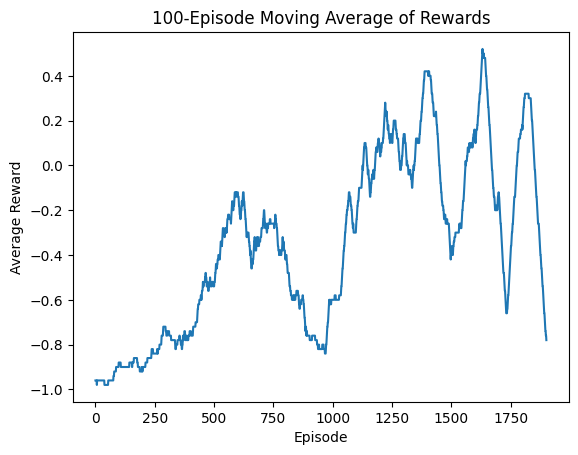

In [124]:
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## Test the Learned Policy

In [ ]:
def test_agent(Q, episodes=5):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            env.render()
            state = next_state



In [ ]:
test_agent(Q)

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5


/home/tamanna/Documents/Summer Of Code/Battle-Of-The-Bots/venv/lib/python3.12/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


## TLDR

Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.

